In [1]:
%matplotlib inline
import h5py
import numpy as np
import os
from UG2.utils import data as data_utils
from UG2.utils import image as image_utils
from UG2.config import Config
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
from torch.autograd import Variable
import scipy.ndimage as im
import time 
from UG2 import main

In [2]:
destination_path     = "/data/UG2_data/h5Files/testh5Files"
data_source_path     = "/data/UG2_data/imagenet_new_cropped/"

In [3]:
## create blurred-dataset 
patch_size          = np.array([224,224])
source_name_files   = []
kernel_blurring_flag= True
num_files           = 1
scale_factor        = 1
flags               = [0, 1]
gaussian_blur_range = [0.1, 2.5]
nTK                 = 1
image_format        = ".h5" 
blur_Seed           = "FixedSeed"

In [4]:
source_name_files   = []
if image_format == ".png":
    for i in range(num_files):
        source_name_files.append("img_"+"%03d"%(i+1)+"_SRF_2_HR")
else:
    for i in range(num_files):
        source_name_files.append("imagenet_"+str(i+1))
        
blur_parameters = {}

blur_parameters["nTK"]                  = nTK
blur_parameters["scale_factor"]         = scale_factor
blur_parameters["flags"]                = flags
blur_parameters["gaussian_blur_range"]  = gaussian_blur_range
blur_parameters["blur_Seed"]            = blur_Seed

if image_format == ".png":
    dataset_name        = "imagenet_flag_" + "_".join([str(f) for f in flags])+"_"+blur_Seed
    data_utils.create_dataset(data_source_path, source_name_files, image_format, destination_path, dataset_name, num_files, patch_size, blur_parameters)
else:
    for i in range(6+1,6+2):
        dataset_name = "imagenet_flag_" + "_".join([str(f) for f in flags])+"_"+blur_Seed + "_" + str(i)
        data_utils.create_dataset(data_source_path, source_name_files[i], image_format, destination_path, dataset_name, num_files, patch_size, blur_parameters)
        print("h5File created: "+destination_path+dataset_name+".h5")

IndexError: list index out of range

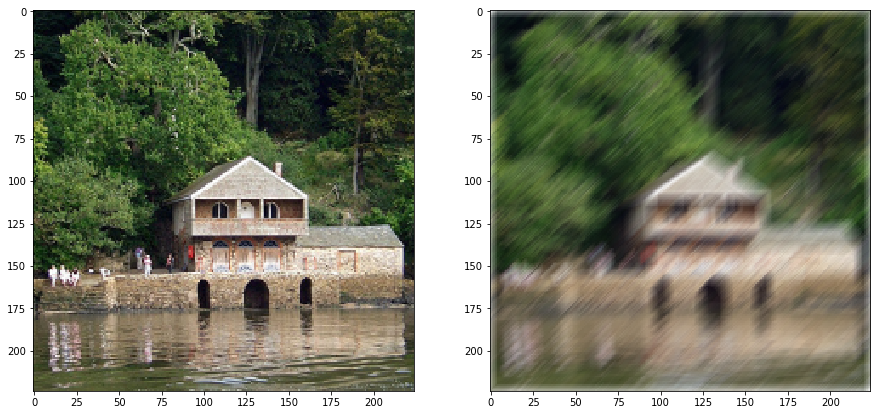

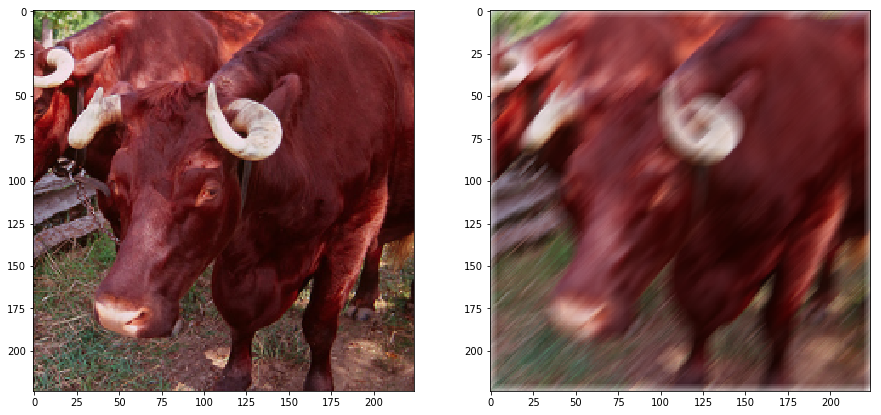

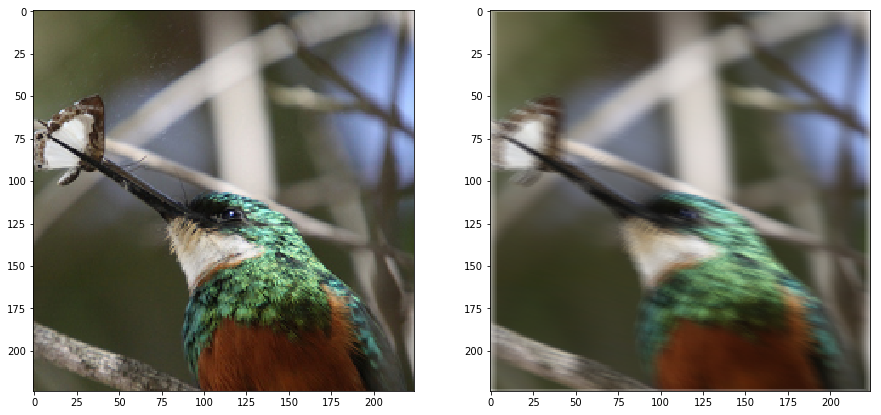

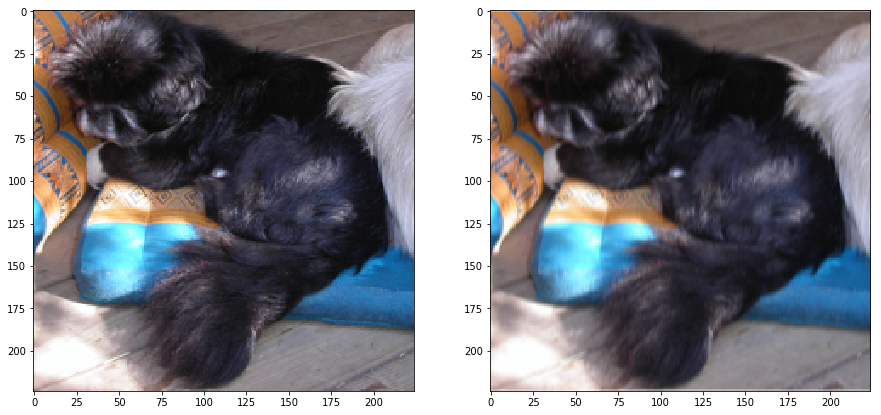

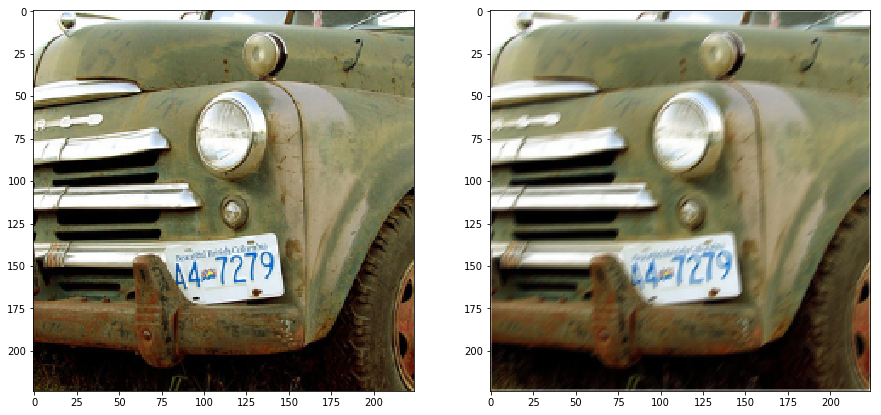

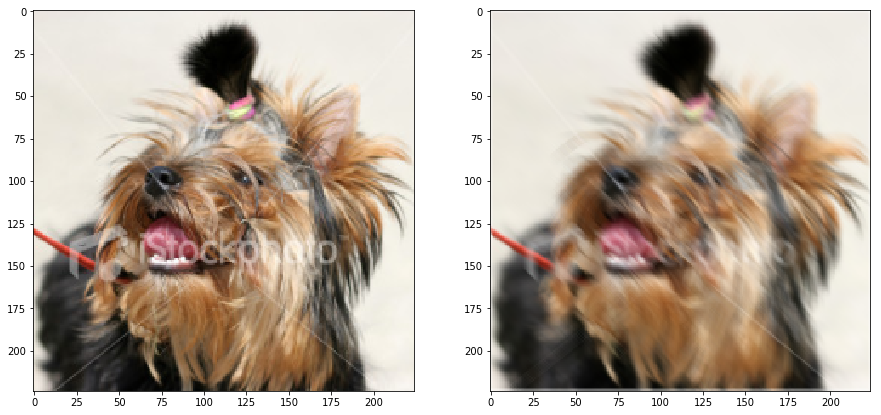

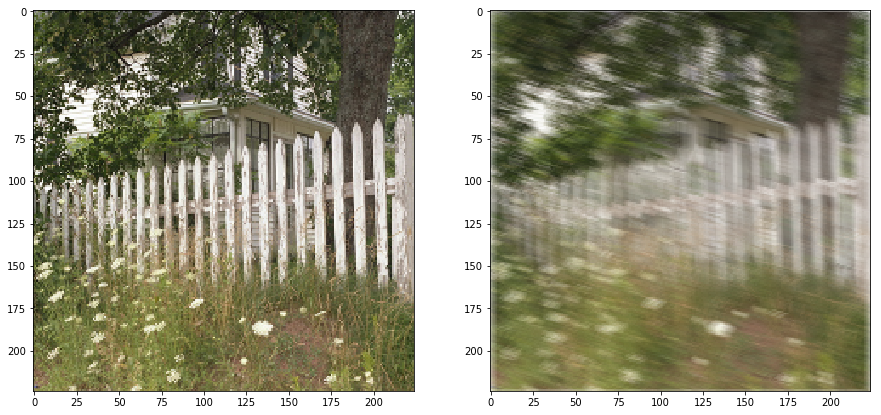

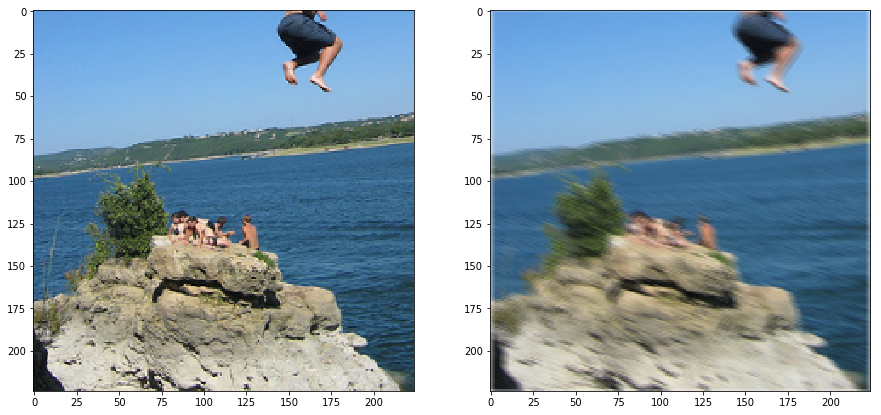

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [5]:
with h5py.File(os.path.join(destination_path, dataset_name+".h5"),'r') as file:
    data = np.array(file["data"])
    label= np.array(file["label"])
for imageIndex in range(10):
    testImage = data[imageIndex]
    testImage = np.transpose(testImage.astype(np.uint8), (1, 2, 0))
    GTImage = label[imageIndex]
    GTImage = np.transpose(GTImage.astype(np.uint8), (1, 2, 0))
    plt.figure(figsize=(15,15))
    plt.subplot(121)
    plt.imshow(GTImage)
    plt.subplot(122)
    plt.imshow(testImage)
